# Index
* [StackOverflow Survey Analysis](#StackOverflow_Survey_Analysis)
    * [Part 1: Loading Data](#part-01)
    * [Part 2: DataFrame and Series Objects](#part-02)
    * [Part 3: Indexes](#part-03)
    * [Part 4: Filtering data from Dataframe and series objects](#part-04)
    * [Part 5: Updating rows and columns, modifying data within Dataframe](#part-05)
    * [Part 7: Sorting Data](#part-07)
    * [Part 8: Grouping, Aggregating, Analysing and Exploring Data](#part-08)
    * [Part 9: Cleaning Data - Casting Data Types and Handling Missing Values](#part-09)
* [Cryptocorrency Data Analysis](#part-10)
    * [Part 10: Working with Dates and Time Series Data](#part-10)
* [Part 11: Reading_Writing Data to Different Sources - Excel, JSON, SQL, Etc](#part-11)
    

In [2]:
import pandas as pd
import numpy as np

# StackOverflow Survey Analysis <a name='StackOverflow_Survey_Analysis'></a>
In this section, we bring it all together, everything that we have learnt and use it to analyse the [2019 StackOverflow Survey Data](https://insights.stackoverflow.com/).

## Part 1: Loading and overviewing data <a name='part-01'></a>



In [3]:
import requests
import zipfile
import io


In [7]:
# URL of the dataset
url = "https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2019.zip"

# Local directory to save and extract
extract_dir = "stackoverflow_2019_data"

# Download the file
print("Downloading file...")
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Extract the zip file
print("Extracting contents...")
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to '{extract_dir}'")


Extracting contents...
Files extracted to 'stackoverflow_2019_data'


In [8]:
# get path of data files
data_file = f"./{extract_dir}/survey_results_public.csv"
schema_data = f"./{extract_dir}/survey_results_schema.csv"

In [9]:
# load data into DataFrame
schema_df = pd.read_csv(schema_data)
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


Note - In case, we want to change the number of columns and rows that are being displayed, we can do so by using ***set_options*** as follows:
```Python
pd.set_options('display.max_columns', 85)  # to display maximum of 85 columns
pd.set_options('display.max_rows', 85)  # to display maximum of 85 rows
```
Try it out.

In [10]:
df = pd.read_csv(data_file)
display(df.head(3))
display(df.tail(3))

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88882,88863,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, and not looking for work",Spain,"Yes, full-time","Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,18.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;White or of European...,No,Appropriate in length,Easy


In [ ]:
# get dimension of DataFrame
df.shape

(88883, 85)

In [ ]:
# display name of columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [ ]:
# get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

## Part 2: Dataframe and Series Datatypes <a name='part-02'></a>


In [ ]:
# get counts of Hobbyist response
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [ ]:
# Slicing DataFrame
display(df.loc[0:3, ['Hobbyist']])
display(df.loc[[0, 1, 2], ['Hobbyist', 'Ethnicity']])
display(df.loc[10:20, 'Hobbyist':'Employment'])

,Hobbyist
0,Yes
1,No
2,Yes
3,No


,Hobbyist,Ethnicity
0,Yes,NaN
1,No,NaN
2,Yes,NaN


,Hobbyist,OpenSourcer,OpenSource,Employment
10,Yes,Once a month or more often,The quality of OSS and closed source software ...,NaN
11,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time
12,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time
13,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time
14,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work"
15,Yes,Never,The quality of OSS and closed source software ...,Employed full-time
16,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time
17,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time
18,Yes,Never,The quality of OSS and closed source software ...,Employed full-time
19,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time


## Part 3: Indexes <a name='part-03'></a>


In [ ]:
# read csv as DataFrame while specifying index
df = pd.read_csv(data_file, index_col='Respondent')
df.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [ ]:
# set column as index
schema_df.set_index('Column', inplace=True)
schema_df.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...


In [ ]:
# printing MainBranch via recent index setting
print(schema_df.loc['MainBranch'])
print(schema_df.loc['MainBranch', 'QuestionText'])

QuestionText    Which of the following options best describes ...
Name: MainBranch, dtype: object
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."


In [ ]:
# sort index of schema_df
schema_df.sort_index(ascending=False)

,QuestionText
Column,
YearsCodePro,How many years have you coded professionally (...
YearsCode,"Including any education, how many years have y..."
WorkWeekHrs,"On average, how many hours per week do you work?"
WorkRemote,How often do you work remotely?
WorkPlan,How structured or planned is your work?
...,...
BlockchainOrg,How is your organization thinking about or imp...
BlockchainIs,Blockchain / cryptocurrency technology is prim...
BetterLife,Do you think people born today will have a bet...


## Part 4: Filtering data from Dataframe and series objects <a name='part-04'></a>

In [ ]:
# filtering rows having salary > 70k
high_sal = df['ConvertedComp'] > 70000
df.loc[high_sal]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,Data or business analyst;Data scientist or mac...,13,15,3,Very satisfied,Slightly satisfied,Very confident,No,Yes,I am not interested in new job opportunities,1-2 years ago,Write any code;Complete a take-home project;In...,No,Financial performance or funding status of the...,I heard about a job opportunity (from a recrui...,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.00,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,A little above average,No,NaN,"Yes, it's not part of our process but the deve...",...,MongoDB;PostgreSQL,PostgreSQL,Android;Google Cloud Platform;Linux;Windows,Android;Google Cloud Platform;Linux;Windows,NaN,NaN,Hadoop,Hadoop;Pandas;TensorFlow;Unity 3D,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Windows,I do not use containers,Not at all,NaN,No,Yes,No,YouTube,In real life (in person),Login,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.00,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific q

In [ ]:
# get only some columns, satisfying the condition
df.loc[high_sal, ['Country', 'ConvertedComp', 'LanguageWorkedWith']]

,Country,ConvertedComp,LanguageWorkedWith
Respondent,,,
6,Canada,366420.0,Java;R;SQL
9,New Zealand,95179.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
13,United States,90000.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
16,United Kingdom,455352.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...
22,United States,103000.0,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...
...,...,...,...
88876,United States,180000.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...
88877,United States,2000000.0,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...
88878,United States,130000.0,HTML/CSS;JavaScript;Scala;TypeScript


In [ ]:
# get data of some conuntries
countries = ['India', 'United States', 'Germany', 'Canada', 'United Kingdom']
filtr = df['Country'].isin(countries)
df.loc[filtr, 'Country']

Respondent
1        United Kingdom
4         United States
6                Canada
8                 India
10                India
              ...      
85642     United States
85961    United Kingdom
86012             India
88282     United States
88377            Canada
Name: Country, Length: 45008, dtype: object

In [ ]:
# filter using substring
filtr = df['LanguageWorkedWith'].str.contains('Python', na=False)
df.loc[filtr, 'LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
8        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
84539    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
85738      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
86566      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
87739             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88212                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

## Part 5: Updating rows and columns, modifying data within Dataframe <a name='part-05'></a>


In [ ]:
# renaming ConvertedComp to Salary, NOT inplace
df.rename(columns={'ConvertedComp':'SalaryUSD'}).columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'SalaryUSD',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc',
       'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow',
       'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
  

In [ ]:
df.rename(columns={'ConvertedComp':'SalaryUSD'}, inplace=True)
df['SalaryUSD']

Respondent
1            NaN
2            NaN
3         8820.0
4        61000.0
5            NaN
          ...   
88377        NaN
88601        NaN
88802        NaN
88816        NaN
88863        NaN
Name: SalaryUSD, Length: 88883, dtype: float64

In [ ]:
# convert Hobbyist's yes no values to True False
df['Hobbyist'] = df['Hobbyist'].map({'Yes':True, 'No':False})
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,True,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,False,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",True,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on

## Part 6: Adding and Removing Rows and Columns from DataFrame <a name='part-06'></a>
Nothing to do here. Move to other one for examples.

## Part 7: Sorting Data <a name='part-07'></a>


In [ ]:
# sort data via country name in aesc and slary in desc
df.sort_values(by=['Country', 'SalaryUSD'],ascending=[True, False] ,inplace=True)
df[['Country', 'SalaryUSD']].head(10)

,Country,SalaryUSD
Respondent,,
63129,Afghanistan,1000000.0
50499,Afghanistan,153216.0
39258,Afghanistan,19152.0
58450,Afghanistan,17556.0
7085,Afghanistan,14364.0
22450,Afghanistan,7980.0
48436,Afghanistan,4464.0
10746,Afghanistan,3996.0
8149,Afghanistan,1596.0


In [ ]:
# getting top n salaries
df['SalaryUSD'].nlargest(3)

Respondent
25983    2000000.0
87896    2000000.0
22013    2000000.0
Name: SalaryUSD, dtype: float64

In [ ]:
# getting last n salaries
df['SalaryUSD'].nsmallest(2)

Respondent
722      0.0
28638    0.0
Name: SalaryUSD, dtype: float64

In [ ]:
# get all details of top n
df.nlargest(3, 'SalaryUSD')

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25983,I am a developer by profession,True,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"10,000 or more employees","Developer, full-stack",8,16,2,Very satisfied,Very satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",3-4 years ago,Solve a brain-teaser style puzzle;Interview wi...,No,Remote work options;Opportunities for professi...,"My job status changed (promotion, new job, etc.)",USD,United States dollar,65500.0,Weekly,2000000.0,45.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,A few days each month,Office,Average,"Yes, because I see value in code review",2.0,"Yes, it's part of our process",...,Microsoft SQL Server;MySQL,Microsoft SQL Server;MySQL,AWS;Docker;Heroku;Linux;MacOS;Raspberry Pi;Win...,AWS;Docker;Linux;MacOS;Windows,Angular/Angular.js,Angular/Angular.js;Flask;React.js,.NET;.NET Core;Node.js,.NET Core;Node.js,Notepad++;Sublime Text;Vim;Visual Studio;Visua...,Windows,Development;Production,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,Yes,Reddit,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
87896,I am a developer by profession,True,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,2-9 employees,"Developer, full-stack",9,17,8,Very satisfied,Very satisfied,Somewhat confident,No,I am already a manager,I am not interested in new job opportunities,More than 4 years ago,Write any code;Interview with people in senior...,No,Office environment or company culture;Diversit...,"Something else changed (education, award, medi...",USD,United States dollar,55000.0,Weekly,2000000.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",3.0,"No, but I think we should",...,MariaDB;MySQL;PostgreSQL,MariaDB;MySQL;PostgreSQL,WordPress,NaN,jQuery;Laravel;Vue.js,Express;Laravel;Ruby on Rails;Vue.js,NaN,Node.js,Sublime Text;Vim;Visual Studio Code,Linux-based,I do not use containers,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,Twitter,Online,Handle,2011,Daily

## Video 8: Grouping, Aggregating, Analysing and Exploring Data <a name='part-08'></a>


In [ ]:
df.sort_index(inplace=True)
df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            88874, 88875, 88876, 88877, 88878, 88879, 88880, 88881, 88882,
            88883],
           dtype='int64', name='Respondent', length=88883)

In [ ]:
df['SalaryUSD'].head(10)

Respondent
1          NaN
2          NaN
3       8820.0
4      61000.0
5          NaN
6     366420.0
7          NaN
8          NaN
9      95179.0
10     13293.0
Name: SalaryUSD, dtype: float64

In [ ]:
# get median of salary
df['SalaryUSD'].median()

57287.0

In [ ]:
# get median of every numerical column
df.median()

Hobbyist           1.0
CompTotal      62000.0
SalaryUSD      57287.0
WorkWeekHrs       40.0
CodeRevHrs         4.0
Age               29.0
dtype: float64

In [ ]:
# get summary of DataFrame
df.describe()
# count is non NaN rows

,CompTotal,SalaryUSD,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [ ]:
# check how many responded to SalayUSD
df['SalaryUSD'].count()

55823

In [ ]:
# check how many are hobbyist
df['Hobbyist'].value_counts()

True     71257
False    17626
Name: Hobbyist, dtype: int64

In [ ]:
# check which SocialMedia is popular among devs
df['SocialMedia'].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

In [ ]:
# check which SocialMedia is popular among devs in percentages
df['SocialMedia'].value_counts(normalize=True)

Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: SocialMedia, dtype: float64

### Grouping
Split -> apply Fxn -> combine result

In [ ]:
# check how many countries are there
print(df['Country'].nunique())
# and their counts
df['Country'].value_counts()

179


United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Chad                                    1
Brunei Darussalam                       1
Saint Vincent and the Grenadines        1
Timor-Leste                             1
Niger                                   1
Name: Country, Length: 179, dtype: int64

In [ ]:
# split data by group
country_grp = df.groupby(['Country'])

In [ ]:
# get group information
country_grp.get_group('India')

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,True,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;Engineer, site reliability",8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js,Hadoop;Node.js;Pandas,Ansible;Apache Spark;Chef;Hadoop;Node.js;Panda...,Atom;IntelliJ;IPython / Jupyter;PyCharm;Visual...,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful across many domains and could change ma...,Yes,SIGH,Yes,YouTube,In real life (in person),Handle,2012,A few times per week,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,True,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",...,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,NaN,Yes,A few times per month or weekly,Yes,"No, and I don't know what those are","Yes, somewhat",Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
15,I am a st

In [ ]:
# get social media popular in a specific country
country_grp.get_group('India')['SocialMedia'].value_counts()

WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
WeChat 微信                      5
Hello                          5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [ ]:
# socialmedia count grouped by country
country_grp['SocialMedia'].value_counts().head(50)
# this returns series object with multiple indexes

Country              SocialMedia             
Afghanistan          Facebook                     15
                     YouTube                       9
                     I don't use social media      6
                     WhatsApp                      4
                     Instagram                     1
                     LinkedIn                      1
                     Twitter                       1
Albania              WhatsApp                     18
                     Facebook                     16
                     Instagram                    13
                     YouTube                      10
                     Twitter                       8
                     LinkedIn                      7
                     Reddit                        6
                     I don't use social media      4
                     Snapchat                      1
                     WeChat 微信                     1
Algeria              YouTube                      42


In [ ]:
# get social media popular in a specific country
country_grp['SocialMedia'].value_counts().loc['India']
# using this method we can now simply change country name to get its results

SocialMedia
WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
Hello                          5
WeChat 微信                      5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [ ]:
# get median salary for every country
country_grp['SalaryUSD'].median()

Country
Afghanistan                               6222.0
Albania                                  10818.0
Algeria                                   7878.0
Andorra                                 160931.0
Angola                                    7764.0
                                          ...   
Venezuela, Bolivarian Republic of...      6384.0
Viet Nam                                 11892.0
Yemen                                    11940.0
Zambia                                    5040.0
Zimbabwe                                 19200.0
Name: SalaryUSD, Length: 179, dtype: float64

### Aggregation

In [ ]:
# check mean, median
country_grp['SalaryUSD'].agg(['mean', 'median'][::-1])

,median,mean
Country,,
Afghanistan,6222.0,101953.333333
Albania,10818.0,21833.700000
Algeria,7878.0,34924.047619
Andorra,160931.0,160931.000000
Angola,7764.0,7764.000000
...,...,...
"Venezuela, Bolivarian Republic of...",6384.0,14581.627907
Viet Nam,11892.0,17233.436782
Yemen,11940.0,16909.166667


In [ ]:
# check mean, median for specific country
country_grp['SalaryUSD'].agg(['mean', 'median'][::-1]).loc['Canada']

median     68705.000000
mean      134018.564909
Name: Canada, dtype: float64

In [ ]:
# how many people know python in India?
filtr = df['Country'] == 'India'
df.loc[filtr]['LanguageWorkedWith'].str.contains('Python').sum()

3105

Note - This :point_down:
```Python
country_grp['LanguageWorkedWith'].str.contains('Python').sum()
```
won't work as the country_grp is not series object anymore, it is SeriesGroupBy object. We need to use apply instead.

In [ ]:
# how many people know python in every country, using seriesGroupBy?
knows_python = country_grp['LanguageWorkedWith'].apply(lambda x:x.str.contains('Python').sum())
knows_python

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [ ]:
# What % people in each country knows Python?
country_respondents = df['Country'].value_counts()
country_respondents

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Chad                                    1
Brunei Darussalam                       1
Saint Vincent and the Grenadines        1
Timor-Leste                             1
Niger                                   1
Name: Country, Length: 179, dtype: int64

In [ ]:
python_df = pd.concat([knows_python, country_respondents], axis='columns')
python_df

,LanguageWorkedWith,Country
Afghanistan,8,44
Albania,23,86
Algeria,40,134
Andorra,0,7
Angola,2,5
...,...,...
"Venezuela, Bolivarian Republic of...",28,88
Viet Nam,78,231
Yemen,3,19
Zambia,4,12


In [ ]:
# renaming columns
python_df.rename(columns={'Country':'NumRespondents',
                          'LanguageWorkedWith':'KnowsPython'}, inplace=True)
python_df

,KnowsPython,NumRespondents
Afghanistan,8,44
Albania,23,86
Algeria,40,134
Andorra,0,7
Angola,2,5
...,...,...
"Venezuela, Bolivarian Republic of...",28,88
Viet Nam,78,231
Yemen,3,19
Zambia,4,12


In [ ]:
# calc % of people knowing python
python_df['PctKnowsPython'] = (python_df['KnowsPython']/python_df['NumRespondents'])*100
python_df[python_df['NumRespondents']>100].sort_values(['PctKnowsPython'], ascending=False).head(20)

,KnowsPython,NumRespondents,PctKnowsPython
South Korea,80,160,50.000000
Chile,102,206,49.514563
Finland,266,546,48.717949
Kenya,120,249,48.192771
United States,10083,20949,48.131176
Israel,457,952,48.004202
Taiwan,88,187,47.058824
Switzerland,460,978,47.034765
Hong Kong (S.A.R.),88,188,46.808511
Japan,182,391,46.547315


In [ ]:
python_df.loc[['India', 'United States']]

,KnowsPython,NumRespondents,PctKnowsPython
India,3105,9061,34.267741
United States,10083,20949,48.131176


## Part 9: Cleaning Data - Casting Data Types and Handling Missing Values <a name='part-09'></a>


In [ ]:
# create a list of missing values and load it in dataframe satisfying the missing criterion
na_vals = ['NA', 'Missing']
df = pd.read_csv(data_file, index_col='Respondent', na_values=na_vals)
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on 

In [ ]:
# Calculate average number of years of coding experience
df['YearsCode'].head()

Respondent
1      4
2    NaN
3      3
4      3
5     16
Name: YearsCode, dtype: object

In [ ]:
# casting age (object) to number
# df['YearsCode'].astype(np.float32)  # this wont work as we have 'Less than 1 year' in this column
# check unique values of 'YearsCode'
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [ ]:
# replace 'Less than 1 year' and 'More than 50 years'
df['YearsCode'].replace('More than 50 years', 51, inplace=True)
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'] = df['YearsCode'].astype(np.float32)
df['YearsCode'].unique()

array([ 4., nan,  3., 16., 13.,  6.,  8., 12.,  2.,  5., 17., 10., 14.,
       35.,  7.,  0., 30.,  9., 26., 40., 19., 15., 20., 28., 25.,  1.,
       22., 11., 33., 50., 41., 18., 34., 24., 23., 42., 27., 21., 36.,
       32., 39., 38., 31., 37., 51., 29., 44., 45., 48., 46., 43., 47.,
       49.], dtype=float32)

In [ ]:
# check mean and median of age
df['YearsCode'].agg(['mean', 'median'])

mean      11.662114
median     9.000000
Name: YearsCode, dtype: float64

# Crypto Currency Data Analysis <a name='part-10'></a>
Since Stackoverflow data does not contain any date time, we can't use it for time series analysis. So here is new [data](https://github.com/CoreyMSchafer/code_snippets/tree/master/Python/Pandas/10-Datetime-Timeseries) that we'll be using for time series analysis. Some other useful stuff- <br>
[Datetime Formatting Codes](http://bit.ly/python-dt-fmt) - used for parsing date<br>
[Pandas Date Offset Codes](#http://bit.ly/pandas-dt-fmt) - used in resampling date


## Part 10: Working with Dates and Time Series Data

In [ ]:
data_path = r"/content/drive/My Drive/Colab Notebooks/Corey Schafer/Pandas/ETH_1h.csv"

In [ ]:
df = pd.read_csv(data_path)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.shape

(23674, 7)

In [ ]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [ ]:
# convert date to date time object, by parsing according to format
# df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
df['Date'].dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
# get day of particular date
df.loc[0, 'Date'].day_name()

'Friday'

In [ ]:
# parsing dates while loading csv to dataframe
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv(data_path, parse_dates=['Date'], date_parser=d_parser)
df.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
# get day name from date series
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [ ]:
# view earliest and latest dates
print(df['Date'].min())
print(df['Date'].max())

2017-07-01 11:00:00
2020-03-13 20:00:00


In [ ]:
# get time frame
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [ ]:
# get data for year range
filtr = (df['Date'] >= '2019-12-01') & (df['Date'] <= '2020')
df.loc[filtr]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1748,2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
...,...,...,...,...,...,...,...,...
2488,2019-12-01 04:00:00,ETHUSD,147.33,148.16,146.90,148.16,241459.79,Sunday
2489,2019-12-01 03:00:00,ETHUSD,146.82,147.57,145.97,147.33,485601.54,Sunday
2490,2019-12-01 02:00:00,ETHUSD,148.59,149.18,146.55,146.82,838826.08,Sunday
2491,2019-12-01 01:00:00,ETHUSD,150.78,150.96,148.01,148.59,496816.36,Sunday


In [ ]:
# set date as index
df.set_index('Date', inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [ ]:
# filter dates
df['2019-12-01':'2020']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2019-12-01 04:00:00,ETHUSD,147.33,148.16,146.90,148.16,241459.79,Sunday
2019-12-01 03:00:00,ETHUSD,146.82,147.57,145.97,147.33,485601.54,Sunday
2019-12-01 02:00:00,ETHUSD,148.59,149.18,146.55,146.82,838826.08,Sunday


In [ ]:
# get average close price of date range
df['2020-01':'2020-02']['Close'].mean()

195.16559027777814

In [ ]:
# check max high values of particular day
df['2020-01-01']['High'].max()

132.68

At the moment, data is broken down on hourly basis, if we wanna redo this on daily, weekly or monthly basis we can do this by resampling.

In [ ]:
# resampling bsaed on daily basis
highs = df['High'].resample('D').max()
highs

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [ ]:
highs['2020-01-01']

132.68

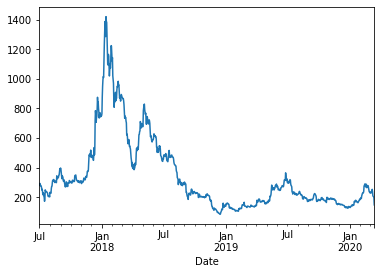

In [ ]:
%matplotlib inline
highs.plot()

In [ ]:
# resampling whole df on weekly basis with its mean
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [ ]:
# resample different columns with different functions
df.resample('W').agg({'Close':'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


# Part 11: Reading/Writing Data to Different Sources - Excel, JSON, SQL, Etc
Go [here](https://www.youtube.com/watch?v=N6hyN6BW6ao&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=11). This section is under development.